In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import datetime 
import pandas as pd
import os
import sqlite3
from sqlite3 import Error

In [2]:
df = pd.read_csv("Sample-Superstore.csv", encoding = "latin1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# Check for duplicates in OrderID and ProductID
duplicates = df[df.duplicated(subset=["Order ID", "Product ID"], keep=False)]

# Display duplicates
print(duplicates)


      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
350      351  CA-2016-129714    9/1/2016    9/3/2016     First Class   
352      353  CA-2016-129714    9/1/2016    9/3/2016     First Class   
430      431  US-2016-123750   4/15/2016   4/21/2016  Standard Class   
431      432  US-2016-123750   4/15/2016   4/21/2016  Standard Class   
1300    1301  CA-2016-137043  12/23/2016  12/25/2016    Second Class   
1301    1302  CA-2016-137043  12/23/2016  12/25/2016    Second Class   
3183    3184  CA-2017-152912   11/9/2017  11/12/2017    Second Class   
3184    3185  CA-2017-152912   11/9/2017  11/12/2017    Second Class   
3405    3406  US-2014-150119   4/23/2014   4/27/2014  Standard Class   
3406    3407  US-2014-150119   4/23/2014   4/27/2014  Standard Class   
6498    6499  CA-2015-103135   7/24/2015   7/28/2015  Standard Class   
6500    6501  CA-2015-103135   7/24/2015   7/28/2015  Standard Class   
7881    7882  CA-2017-118017   12/3/2017   12/6/2017    Second C

In [38]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Loading data into sqllite

In [49]:
# import os

# Delete the old database file if it exists
if os.path.exists("superstore.db"):
    os.remove("superstore.db")


In [50]:
import sqlite3

# Create a fresh SQLite connection
conn = sqlite3.connect("superstore.db")
cursor = conn.cursor()

# Create Tables
cursor.executescript('''
-- Regions Table
CREATE TABLE Regions (
    RegionID INTEGER PRIMARY KEY AUTOINCREMENT,
    RegionName VARCHAR(50),
    State VARCHAR(50),
    City VARCHAR(100),
    PostalCode INT
);

-- Customers Table
CREATE TABLE Customers (
    CustomerID VARCHAR(20) PRIMARY KEY,
    CustomerName VARCHAR(100),
    Segment VARCHAR(50),
    RegionID INT,
    FOREIGN KEY (RegionID) REFERENCES Regions(RegionID)
);

-- Categories Table
CREATE TABLE Categories (
    CategoryID INTEGER PRIMARY KEY AUTOINCREMENT,
    CategoryName VARCHAR(50)
);

-- Products Table
CREATE TABLE Products (
    ProductID VARCHAR(20) PRIMARY KEY,
    ProductName VARCHAR(255),
    CategoryID INT,
    SubCategory VARCHAR(50),
    FOREIGN KEY (CategoryID) REFERENCES Categories(CategoryID)
);

-- Shipping Table
CREATE TABLE Shipping (
    ShipID INTEGER PRIMARY KEY AUTOINCREMENT,
    ShipMode VARCHAR(50),
    ShipDate DATE
);

-- Orders Table
CREATE TABLE Orders (
    OrderID VARCHAR(20) PRIMARY KEY,
    OrderDate DATE,
    CustomerID VARCHAR(20),
    ShipID INT,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
    FOREIGN KEY (ShipID) REFERENCES Shipping(ShipID)
);

-- Order Details Table
CREATE TABLE OrderDetails (
    OrderDetailID INTEGER PRIMARY KEY AUTOINCREMENT,
    OrderID VARCHAR(20),
    ProductID VARCHAR(20),
    Sales DECIMAL(10,2),
    Quantity INT,
    Discount DECIMAL(5,2),
    Profit DECIMAL(10,2),
    FOREIGN KEY (OrderID) REFERENCES Orders(OrderID),
    FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
);
''')

# Commit and close connection
conn.commit()
conn.close()


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

#sqlalchemy.create_engine is used to create a connection to the SQLite database in a more flexible way, allowing pandas to directly write (to_sql) and read (read_sql) data.

# Read the CSV file
df = pd.read_csv("Sample-Superstore.csv", encoding="latin1")

## fixing date columns #NOTE - # order date and ship date are formatted as dd/mm/yyyy, and to extract year or month from date with sqlite i need to reformat
# to yyyy/mm/dd. It would be possible to do it with sqlite, but the main issue is that same dates are shown like this:
# d/mm/yyyy or dd/m/yyyy, which makes it extra hard to fix with sqlite

df["Order Date"] = pd.to_datetime(df["Order Date"], format='mixed')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format='mixed')
df["Order Date"] = df["Order Date"].astype(str)
df["Ship Date"] = df["Ship Date"].astype(str)

# Drop Row ID since it doesnt have any meaningful role in relationships / prevent errors
df.drop(columns=["Row ID"], inplace=True)

# Connect to SQLite
engine = create_engine("sqlite:///superstore.db")

### Insert Data into Regions ###
regions_df = df[['Region', 'State', 'City', 'Postal Code']].drop_duplicates().rename(
    columns={'Region': 'RegionName', 'Postal Code': 'PostalCode'}
)
regions_df.to_sql('Regions', con=engine, if_exists='append', index=False)

### Insert Data into Customers ###
customers_df = df[['Customer ID', 'Customer Name', 'Segment', 'Region', 'State', 'City', 'Postal Code']].drop_duplicates().rename(columns={"Region":"RegionName", "Postal Code":"PostalCode"})
regions_df = pd.read_sql("SELECT * FROM Regions", con=engine)  # Fetch Region IDs
customers_df = customers_df.merge(
    regions_df, on=['RegionName', 'State', 'City', 'PostalCode'], how='left'
).drop(columns=['RegionName', 'State', 'City', 'PostalCode'])
customers_df.rename(columns={'Customer ID': 'CustomerID', 'Customer Name': 'CustomerName'}, inplace=True)
### **Drop duplicates by CustomerID after merging**
customers_df = customers_df.drop_duplicates(subset=['CustomerID'])
customers_df.to_sql('Customers', con=engine, if_exists='append', index=False)

### Insert Data into Categories ###
categories_df = df[['Category']].drop_duplicates().rename(columns={'Category': 'CategoryName'})
categories_df.to_sql('Categories', con=engine, if_exists='append', index=False)

### Insert Data into Products ###
products_df = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].drop_duplicates().rename(
    columns={"Sub-Category":"SubCategory"}
)
categories_df = pd.read_sql("SELECT * FROM Categories", con=engine)  # Fetch Category IDs
products_df = products_df.merge(categories_df, left_on='Category', right_on='CategoryName', how='left').drop(columns=['Category', 'CategoryName'])
products_df.rename(columns={'Product ID': 'ProductID', 'Product Name': 'ProductName'}, inplace=True)
products_df = products_df.drop_duplicates(subset=['ProductID'])
products_df.to_sql('Products', con=engine, if_exists='append', index=False)

# ### Insert Data into Shipping ###
shipping_df = df[['Ship Mode', 'Ship Date']].drop_duplicates().rename(columns={"Ship Mode": "ShipMode", "Ship Date":"ShipDate"})
shipping_df.to_sql('Shipping', con=engine, if_exists='append', index=False)

# ### Insert Data into Orders ###
orders_df = df[['Order ID', 'Order Date', 'Customer ID', 'Ship Mode', 'Ship Date']].drop_duplicates().rename(
    columns={"Ship Mode": "ShipMode", "Ship Date":"ShipDate"})
shipping_df = pd.read_sql("SELECT * FROM Shipping", con=engine)  # Fetch Ship IDs
orders_df = orders_df.merge(shipping_df, on=['ShipMode', 'ShipDate'], how='left').drop(columns=['ShipMode', 'ShipDate'])
orders_df.rename(columns={'Order ID': 'OrderID', 'Order Date': 'OrderDate', 'Customer ID': 'CustomerID'}, inplace=True)
orders_df.to_sql('Orders', con=engine, if_exists='append', index=False)

# ### Insert Data into OrderDetails ###
order_details_df = df[['Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
order_details_df.rename(columns={'Order ID': 'OrderID', 'Product ID': 'ProductID'}, inplace=True)
order_details_df.to_sql('OrderDetails', con=engine, if_exists='append', index=False)

print("✅ Database successfully created and loaded!")



✅ Database successfully created and loaded!


/var/folders/kj/_mqw0wd165b_qz356cmtmkzc0000gn/T/ipykernel_14051/2442858953.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_details_df.rename(columns={'Order ID': 'OrderID', 'Product ID': 'ProductID'}, inplace=True)


# Queries

In [32]:
# What is the category generating the maximum sales revenue?
query ="""
SELECT CategoryName, sum(Sales) as revenue
FROM Products p
JOIN OrderDetails o ON p.ProductID = o.ProductID
JOIN Categories c ON c.CategoryID = p.CategoryID
GROUP BY CategoryName
ORDER BY revenue DESC
LIMIT 1
"""
pd.read_sql(query, con=engine)



,CategoryName,revenue
0,Technology,836154.033


In [14]:
df.groupby("Category")["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [15]:
# What about the profit in this category?
query ="""
SELECT CategoryName, sum(Sales) as revenue, sum(Profit)
FROM Products p
JOIN OrderDetails o ON p.ProductID = o.ProductID
JOIN Categories c ON c.CategoryID = p.CategoryID
GROUP BY CategoryName
ORDER BY revenue DESC
LIMIT 1
"""
pd.read_sql(query, con=engine)

,CategoryName,revenue,sum(Profit)
0,Technology,2508462.099,436364.8443


In [ ]:
# Are they making a loss in any categories?
# Profit margin tells how much profit is made for each dollar of revenue.
query ="""
SELECT 
    CategoryName, 
    sum(Sales) as Revenue, 
    sum(Profit) as Profit,
    (SUM(o.Profit) / SUM(o.Sales)) * 100 AS profit_margin
FROM Products p
JOIN OrderDetails o ON p.ProductID = o.ProductID
JOIN Categories c ON c.CategoryID = p.CategoryID
GROUP BY CategoryName
ORDER BY Profit DESC
"""
pd.read_sql(query, con=engine)

,CategoryName,Revenue,Profit,profit_margin
0,Technology,836154.0330,145454.9481,17.395712
1,Office Supplies,719047.0320,122490.8008,17.035158
2,Furniture,741999.7953,18451.2728,2.486695


#NOTE - furniture has a really low profit, considering the amount of revenue it generates

In [17]:
# What are the 5 states generating max and min revenue?
query = """
WITH RankedStates AS (
    SELECT r.State, 
           SUM(od.Sales) AS revenue,
           RANK() OVER (ORDER BY SUM(od.Sales) DESC) AS top_rank,
           RANK() OVER (ORDER BY SUM(od.Sales) ASC) AS bottom_rank
    FROM Regions r
    JOIN Customers c ON r.RegionID = c.RegionID
    JOIN Orders o ON c.CustomerID = o.CustomerID
    JOIN OrderDetails od ON o.OrderID = od.OrderID
    GROUP BY r.State
)
SELECT State, revenue 
FROM RankedStates
WHERE top_rank <= 5 OR bottom_rank <= 5;"""

pd.read_sql(query, con=engine)


,State,revenue
0,California,1.353110e+06
1,New York,8.386495e+05
2,Texas,5.782746e+05
3,Pennsylvania,4.285157e+05
4,Washington,3.995318e+05
5,South Dakota,7.018794e+03
6,District of Columbia,6.595350e+03
7,Kansas,5.182956e+03
8,Maryland,4.766430e+03
9,Nevada,3.644958e+03


In [18]:
# What are the 3 products in each product segment with the highest sales?

query ="""

with cte AS(
SELECT p.ProductName,c.Segment,SUM(od.Sales) as revenue, RANK()OVER(PARTITION BY Segment ORDER BY SUM(od.Sales) DESC) as rank
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY c.Segment, p.ProductName
)

SELECT ProductName, Segment, revenue
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)



,ProductName,Segment,revenue
0,Canon imageCLASS 2200 Advanced Copier,Consumer,98699.718
1,HP Designjet T520 Inkjet Large Format Printer ...,Consumer,55124.685
2,HON 5400 Series Task Chairs for Big and Tall,Consumer,52152.912
3,Canon imageCLASS 2200 Advanced Copier,Corporate,52499.850
4,"3D Systems Cube Printer, 2nd Generation, Magenta",Corporate,42899.670
5,Martin Yale Chadless Opener Electric Letter Op...,Corporate,24984.300
6,Cisco TelePresence System EX90 Videoconferenci...,Home Office,67915.440
7,Canon imageCLASS 2200 Advanced Copier,Home Office,33599.904
8,Hewlett Packard LaserJet 3310 Copier,Home Office,27719.538


In [85]:
# Are they the 3 most profitable products as well?

query ="""

with cte AS(
SELECT p.ProductName,c.Segment,SUM(od.Sales) as Revenue,sum(Profit) as Profit, RANK()OVER(PARTITION BY Segment ORDER BY SUM(od.Profit) DESC) as rank
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY c.Segment, p.ProductName
)

SELECT ProductName, Segment, Revenue, Profit
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)



,ProductName,Segment,Revenue,Profit
0,Canon imageCLASS 2200 Advanced Copier,Consumer,32899.906,12879.9632
1,Ibico EPK-21 Electric Binding System,Consumer,9449.950,4630.4755
2,HP Designjet T520 Inkjet Large Format Printer ...,Consumer,18374.895,4094.9766
3,Canon imageCLASS 2200 Advanced Copier,Corporate,17499.950,8399.9760
4,"3D Systems Cube Printer, 2nd Generation, Magenta",Corporate,14299.890,3717.9714
5,Fellowes PB300 Plastic Comb Binding Machine,Corporate,7759.800,3030.2019
6,Hewlett Packard LaserJet 3310 Copier,Home Office,9239.846,3935.9344
7,Canon imageCLASS 2200 Advanced Copier,Home Office,11199.968,3919.9888
8,Canon imageCLASS MF7460 Monochrome Digital Las...,Home Office,3991.980,1995.9900


In [20]:
# What are the 3 best-seller products in each product segment? (Quantity-wise)

query ="""

with cte AS(
SELECT c.Segment, p.ProductName,SUM(od.Quantity) as Quantity, RANK()OVER(PARTITION BY Segment ORDER BY SUM(od.Quantity) DESC) as rank
FROM Customers c
JOIN Orders o ON c.CustomerID = o.CustomerID
JOIN OrderDetails od ON o.OrderID = od.OrderID
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY c.Segment, p.ProductName
)

SELECT Segment, ProductName, Quantity
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)



,Segment,ProductName,Quantity
0,Consumer,Staple envelope,312
1,Consumer,Staples,291
2,Consumer,Staples in misc. colors,225
3,Corporate,Staples,270
4,Corporate,Staple envelope,189
5,Corporate,Easy-staple paper,132
6,Home Office,Easy-staple paper,138
7,Home Office,Xerox 1881,96
8,Home Office,Xerox 226,93
9,Home Office,"Global Stack Chair without Arms, Black",93


In [21]:
# What are the top 3 worst-selling products in every category? (Quantity-wise)

query ="""

with cte AS(
SELECT c.CategoryName, p.ProductName,SUM(od.Quantity) as Quantity, RANK()OVER(PARTITION BY CategoryName ORDER BY SUM(od.Quantity) ASC) as rank
FROM Categories c
JOIN Products p ON c.CategoryID = p.CategoryID
JOIN OrderDetails od ON p.ProductID = od.ProductID
GROUP BY c.CategoryName, p.ProductName
)

SELECT CategoryName, ProductName, Quantity
FROM cte
WHERE rank in (1,2,3)


"""
pd.read_sql(query, con=engine)

,CategoryName,ProductName,Quantity
0,Furniture,"Bush Saratoga Collection 5-Shelf Bookcase, Han...",3
1,Furniture,Global Enterprise Series Seating Low-Back Swiv...,3
2,Furniture,Barricks Non-Folding Utility Table with Steel ...,6
3,Furniture,Ultra Commercial Grade Dual Valve Door Closer,6
4,Office Supplies,Boston 1900 Electric Pencil Sharpener,3
5,Office Supplies,Xerox 20,3
6,Office Supplies,Avery 5,6
7,Office Supplies,Avery Hi-Liter Pen Style Six-Color Fluorescent...,6
8,Office Supplies,Eureka Disposable Bags for Sanitaire Vibra Gro...,6
9,Office Supplies,Grip Seal Envelopes,6


In [ ]:
# How many unique customers per month are there for the year 2016. (There's a catch here: contrary to other 'heavier' RDBMS, SQLite does not support the functions YEAR() or MONTH() to extract the year or the month in a date. You will have to create two new columns: year and month.)

query ="""
SELECT 
    strftime('%Y', OrderDate) as Year,
    strftime('%m', OrderDate) as Month,
    count(DISTINCT CustomerId) as Customers
FROM Orders
WHERE Year = '2016'
GROUP BY Year, Month
ORDER BY OrderDate ASC




"""
# The substr function in SQLite extracts a portion of a string. The parameters for substr are:
# The string you want to extract from (Date in this case).
# The starting position in the string (counting from 1).
# The length of the substring to extract.

# SELECT strftime('%Y', formatted_date) AS Year FROM (
#     -- Use the above query as a subquery
#     SELECT 
#         CASE 
#             WHEN length(OrderDate) - length(REPLACE(OrderDate, '/', '')) = 2 THEN 
#                 substr(OrderDate, -4, 4) || '-' || 
#                 substr('0' || trim(substr(OrderDate, instr(OrderDate, '/') + 1, instr(substr(OrderDate, instr(OrderDate, '/') + 1), '/') - 1)), -2, 2) || '-' || 
#                 substr('0' || trim(substr(OrderDate, 1, instr(OrderDate, '/') - 1)), -2, 2)

#             WHEN length(OrderDate) - length(REPLACE(OrderDate, '/', '')) = 1 THEN 
#                 substr(OrderDate, -4, 4) || '-' || 
#                 substr('0' || trim(substr(OrderDate, instr(OrderDate, '/') + 1)), -2, 2) || '-' || 
#                 substr('0' || trim(substr(OrderDate, 1, instr(OrderDate, '/') - 1)), -2, 2)

#             ELSE NULL
#         END AS formatted_date
#     FROM Orders
# );

pd.read_sql(query, con=engine)

,Year,Month,Customers
0,2016,01,48
1,2016,02,45
2,2016,03,86
3,2016,04,89
4,2016,05,108
5,2016,06,97
6,2016,07,96
7,2016,08,90
8,2016,09,192
9,2016,10,105


# EDA

What customer purchasing patterns can you discover? Such as activity during the days of the week, weekly, monthly, quarterly, yearly, etc.

Are there specific days/months/quarters when the sales have been unusually high/low, and what could be the possible reasons? How about the profit and loss margin?

Which States and which customers made the highest number of orders? Are they the same as the highest spending States and customers?

Can you make a map showing the 5 States generating the most and least sales revenue?

Can we see any patterns in the quarterly revenue behavior?

Can you create a plot showing the growth rate of new customers over the months?

What do you think about the customers? Are they individuals or wholesalers? Why would you say so?

Are there any issues with the dataset?

In [76]:
# check count of sales per month/year

query = """
SELECT COUNT(Sales), strftime('%Y', OrderDate) AS Year
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year

"""
pd.read_sql(query, con = engine )

,COUNT(Sales),Year
0,1993,2014
1,2102,2015
2,2587,2016
3,3312,2017


In [95]:
# avg purchasing by dow / week / month / 

# dow - monday as day 1

query = """
SELECT AVG(Sales), strftime('%u', OrderDate) AS DOW 
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY DOW
ORDER BY AVG(Sales) DESC

"""
pd.read_sql(query, con = engine )


,AVG(Sales),DOW
0,259.683094,2
1,237.350337,3
2,235.254268,5
3,229.255914,1
4,225.353127,7
5,220.072302,4
6,216.304944,6


Cannot generalize much, besides that weekends are lower on revenue

In [ ]:
# week
query = """
SELECT AVG(Sales), strftime('%U', OrderDate) AS WeekOfYear
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY WeekOfYear

"""
pd.read_sql(query, con = engine )


In [92]:

# monthly
query = """
SELECT AVG(Sales), strftime('%m', OrderDate) AS Month
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Month

"""
pd.read_sql(query, con = engine)


,AVG(Sales),Month
0,249.146550,01
1,199.170838,02
2,294.548116,03
3,206.230731,04
4,210.923553,05
5,212.996763,06
6,207.377601,07
7,225.274877,08
8,222.451154,09
9,244.594609,10


In [ ]:
# avg yearly
query = """
SELECT AVG(Sales), strftime('%Y', OrderDate) AS Year
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year

"""
pd.read_sql(query, con = engine )

,AVG(Sales),Year
0,242.974159,2014
1,223.849909,2015
2,235.487282,2016
3,221.381418,2017


In [94]:
#total yearly sales
query = """
SELECT sum(Sales) AS TotalSales, strftime('%Y', OrderDate) AS Year
FROM Orders o
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year

"""
pd.read_sql(query, con = engine )

,TotalSales,Year
0,484247.4981,2014
1,470532.5090,2015
2,609205.5980,2016
3,733215.2552,2017


total sales increased each year, but the avg sale decreased

In [84]:
# avg sales per quarter
query = """
select
    CASE 
        when 0 + strftime('%m', OrderDate) between  1 and  3 then 'Q1'
        when 0 + strftime('%m', OrderDate) between  4 and  6 then 'Q2'
        when 0 + strftime('%m', OrderDate) between  7 and  9 then 'Q3'
        when 0 + strftime('%m', OrderDate) between 10 and 12 then 'Q4'
    END AS Quarter,
    AVG(sales) AS AverageSales
FROM Orders o 
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY quarter
"""
pd.read_sql(query, con = engine )

# the addition of 0 is there to force the conversion of the result of strftime() to a number.

,Quarter,AverageSales
0,Q1,261.206664
1,Q2,210.146047
2,Q3,219.339802
3,Q4,237.446609


On average Q1 makes the most sales

In [109]:
# total sales per quarter and year
query = """
select
    Strftime('%Y', OrderDate) AS Year,
    CASE 
        when 0 + strftime('%m', OrderDate) between  1 and  3 then 'Q1'
        when 0 + strftime('%m', OrderDate) between  4 and  6 then 'Q2'
        when 0 + strftime('%m', OrderDate) between  7 and  9 then 'Q3'
        when 0 + strftime('%m', OrderDate) between 10 and 12 then 'Q4'
    END AS Quarter,
    SUM(sales) AS TotalSales,
    RANK () OVER (PARTITION BY Strftime('%Y', OrderDate) ORDER BY SUM(sales) DESC ) as Rank
FROM Orders o 
JOIN OrderDetails od ON o.OrderID = od.OrderID
GROUP BY Year, Quarter
"""
pd.read_sql(query, con = engine )

,Year,Quarter,TotalSales,Rank
0,2014,Q4,179627.7302,1
1,2014,Q3,143633.2123,2
2,2014,Q2,86538.7596,3
3,2014,Q1,74447.7960,4
4,2015,Q4,182297.0082,1
5,2015,Q3,130259.5752,2
6,2015,Q2,89124.1870,3
7,2015,Q1,68851.7386,4
8,2016,Q4,236098.7538,1
9,2016,Q3,143787.3622,2


Total sales increase as the year goes by, with max sales in Q4

In [112]:
df["Sales"].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

some huge outliers that need to be explored

<Axes: xlabel='Sales', ylabel='Count'>

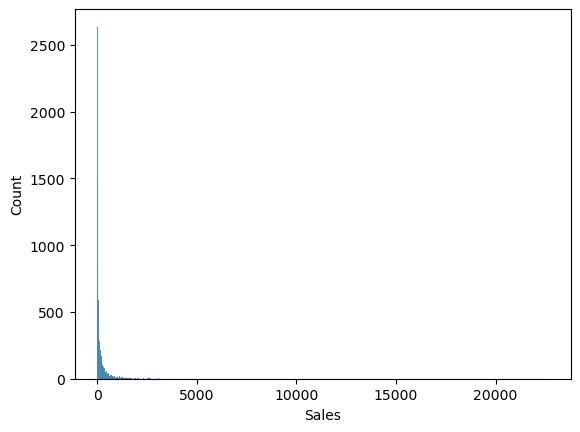

In [111]:
sns.histplot(data=df, x="Sales")

In [ ]:
# count orders over 300 

query = """
SELECT
    count(*)
FROM OrderDetails
WHERE Sales > 300
"""

pd.read_sql(query, con = engine )
#TODO - identify the outliers

,count(*)
0,1904


need to separate in categories to get a proper idea of what's going on

In [ ]:
# avg sale per category

query = """
SELECT
    AVG(Sales),
    CategoryName
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
GROUP BY CategoryName

"""

sales_category = pd.read_sql(query, con = engine )


,AVG(Sales),CategoryName
0,349.834887,Furniture
1,119.324101,Office Supplies
2,452.709276,Technology


<Axes: xlabel='CategoryName', ylabel='AVG(Sales)'>

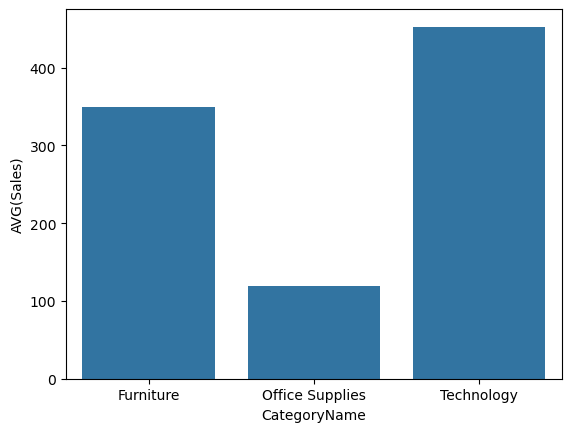

In [132]:
sns.barplot(data=sales_category, x= "CategoryName", y = "AVG(Sales)")

In [153]:
# distribution of sales per category

furniture_query ="""
SELECT CategoryName, Sales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE CategoryName = 'Furniture'

"""
office_supplies_query ="""
SELECT CategoryName, Sales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE CategoryName = 'OfficeSupplies'

"""
technlogy_query ="""
SELECT CategoryName, Sales
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE CategoryName = 'Technology'

"""

furniture_sales = pd.read_sql(furniture_query, con = engine )
office_supplies_sales = pd.read_sql(office_supplies_query, con = engine )
technology_sales= pd.read_sql(technlogy_query, con = engine )


<Axes: xlabel='Sales', ylabel='Count'>

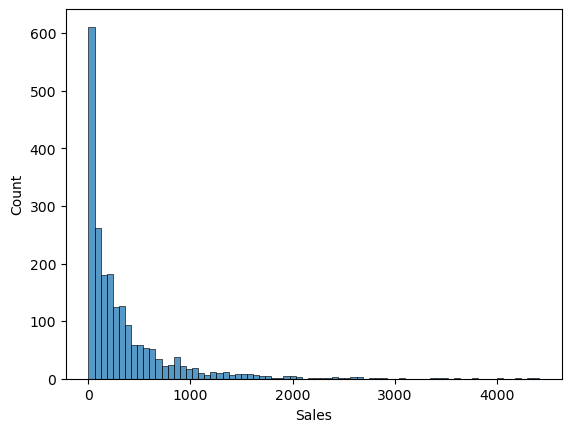

In [152]:
sns.histplot(data=furniture_sales, x="Sales" )

In [ ]:
# state with most (unique)customers - cities in the top 3
# Products with most discount
# Preferred ship mode per state
# Discount : most discounted products, categories, per state, discount as total money lost

In [113]:
# looking at discounts

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
